In [ ]:
# for basic operations
import pandas as pd
import numpy as np
 
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx
 
# for market basket analysis
import mlxtend

In [ ]:
# reading the dataset
data = pd.read_csv('/Market_Basket_Optimisation.csv', header=None)

In [ ]:
data.shape

(7501, 20)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking the random entries in the data
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5339,avocado,cider,cake,french fries,melons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,strong cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3529,shrimp,milk,butter,pancakes,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4651,butter,barbecue sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,eggs,strawberries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,spaghetti,chocolate,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3306,frozen vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2708,butter,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2279,ground beef,mineral water,eggs,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,shrimp,pasta,spaghetti,eggs,hot dogs,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


#Exploratory Data Analysis

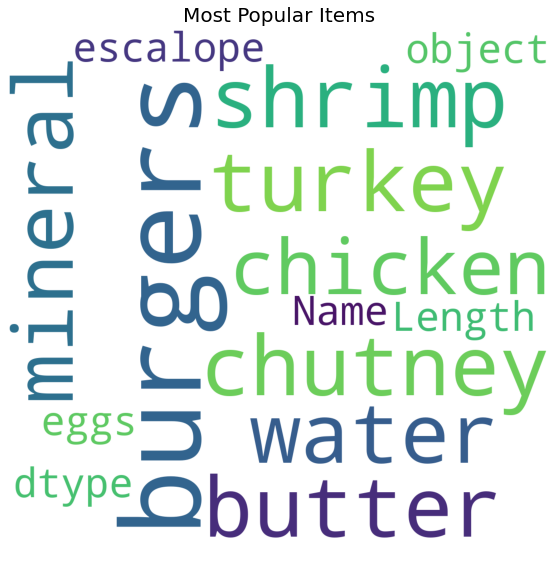

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

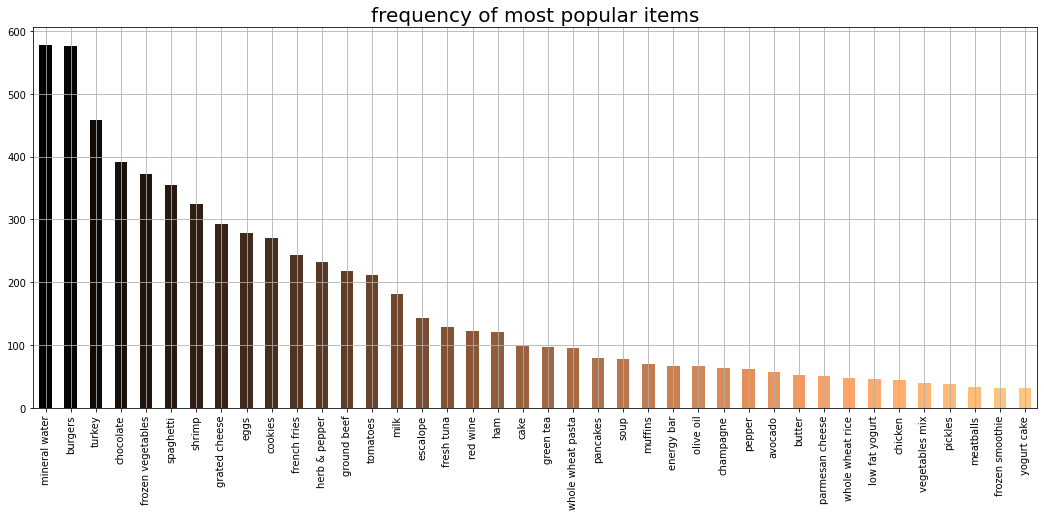

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object')

In [ ]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

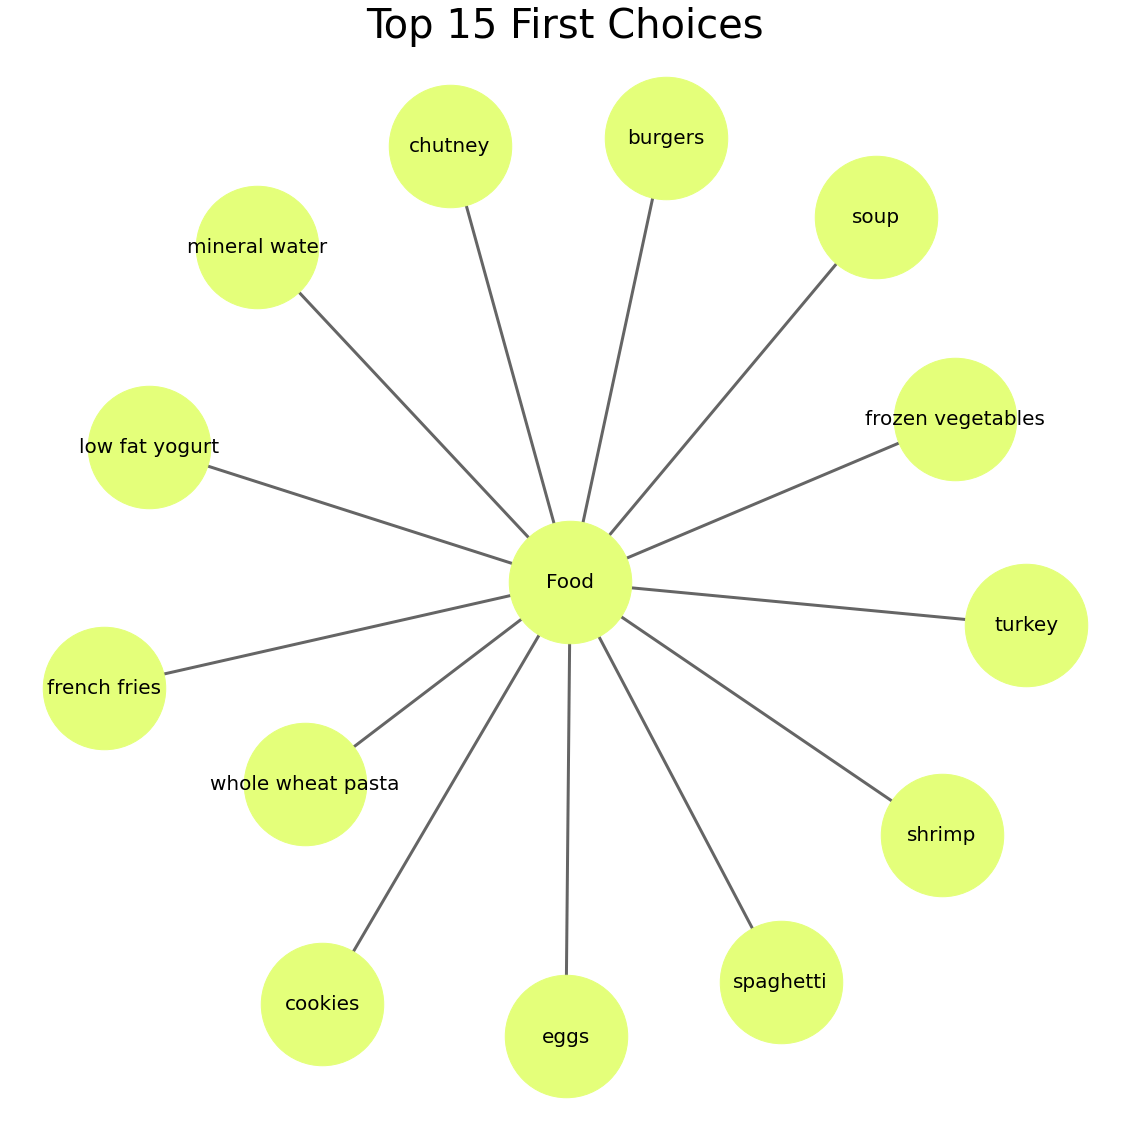

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

#Data Pre-processing

In [ ]:
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

trans = np.array(trans)

print(trans.shape)

(7501, 20)


In [ ]:
trans

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [ ]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data = data.loc[:, list(y.index)]
data.shape

(7501, 50)

In [ ]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,dessert wine,hot dogs,honey,candy bars,cereals,strawberries,yams,oil,tomato sauce
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
# for market basket analysis
# transaction dataframe converts into a table with True and False values for all the items in the transactions
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, fpmax, fpcommon 

#Apriori

In [ ]:
# apriori() function evaluates support value for each product
#  minimum support = 1%
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(ground beef, eggs, mineral water)",3
219,0.013065,"(milk, eggs, mineral water)",3
220,0.011065,"(ground beef, milk, mineral water)",3
221,0.010532,"(spaghetti, chocolate, eggs)",3


In [ ]:
# association_rules() function help us to understand relationship between antecedents and consequences products
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
45,"(french fries, mineral water)",(spaghetti),0.033729,0.174110,0.010132,0.300395,2,1
33,(soup),(milk),0.050527,0.129583,0.015198,0.300792,1,1
35,"(chocolate, mineral water)",(spaghetti),0.052660,0.174110,0.015865,0.301266,2,1
28,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1,1
0,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1,1
59,"(spaghetti, milk)",(chocolate),0.035462,0.163845,0.010932,0.308271,2,1
42,"(frozen vegetables, mineral water)",(milk),0.035729,0.129583,0.011065,0.309701,2,1
24,(turkey),(eggs),0.062525,0.179709,0.019464,0.311301,1,1
17,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1,1
25,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1,1


In [ ]:
#  minimum support = 3%
frequent_itemsets = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
9,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1,1
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1
7,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1,1
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1,1
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1,1
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,1,1
5,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1,1


In [ ]:
#  minimum support = 5%
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
5,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1,1
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1,1
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1


#FP Growth

In [ ]:
#  minimum support = 1%
frequent_itemsets = fpgrowth(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.132116,(green tea),1
2,0.076523,(low fat yogurt),1
3,0.071457,(shrimp),1
4,0.065858,(olive oil),1
...,...,...,...
218,0.011465,"(cake, burgers)",2
219,0.014131,"(cake, green tea)",2
220,0.010265,"(cake, frozen vegetables)",2
221,0.011865,"(cake, pancakes)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
23,"(french fries, mineral water)",(spaghetti),0.033729,0.174110,0.010132,0.300395,2,1
24,(soup),(milk),0.050527,0.129583,0.015198,0.300792,1,1
37,"(chocolate, mineral water)",(spaghetti),0.052660,0.174110,0.015865,0.301266,2,1
40,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1,1
13,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1,1
19,"(spaghetti, milk)",(chocolate),0.035462,0.163845,0.010932,0.308271,2,1
32,"(frozen vegetables, mineral water)",(milk),0.035729,0.129583,0.011065,0.309701,2,1
12,(turkey),(eggs),0.062525,0.179709,0.019464,0.311301,1,1
0,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1,1
47,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1,1


In [ ]:
#  minimum support = 3%
frequent_itemsets = fpgrowth(data, min_support = 0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.132116,(green tea),1
2,0.076523,(low fat yogurt),1
3,0.071457,(shrimp),1
4,0.065858,(olive oil),1
5,0.063325,(frozen smoothie),1
6,0.047460,(honey),1
7,0.042528,(salmon),1
8,0.033329,(avocado),1
9,0.179709,(eggs),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
2,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1,1
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
6,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1
7,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1,1
1,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1,1
5,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1,1
9,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,1,1
8,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1,1


In [ ]:
#  minimum support = 5%
frequent_itemsets = fpgrowth(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.132116,(green tea),1
2,0.076523,(low fat yogurt),1
3,0.071457,(shrimp),1
4,0.065858,(olive oil),1
5,0.063325,(frozen smoothie),1
6,0.179709,(eggs),1
7,0.087188,(burgers),1
8,0.062525,(turkey),1
9,0.129583,(milk),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1,1
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1,1
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1


#Time Comparison

In [ ]:
from timeit import repeat

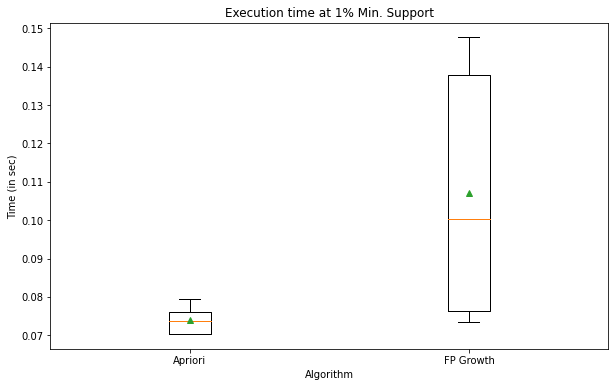

In [ ]:
testcases = [''' 
def fn(): 
    return apriori(data, min_support = 0.01, use_colnames=True)
''',
''' 
def fn(): 
    return fpgrowth(data, min_support = 0.01, use_colnames=True)
''']


res_apriori1 = repeat(stmt=testcases[0], repeat=5)

res_fpgrowth1 = repeat(stmt=testcases[1], repeat=5)

results1 = [res_apriori1,res_fpgrowth1]

plt.figure(figsize=(10,6))
plt.boxplot(results1, labels=["Apriori", "FP Growth"], showmeans=True)
plt.title("Execution time at 1% Min. Support")
plt.xlabel("Algorithm")
plt.ylabel("Time (in sec)")
plt.show()

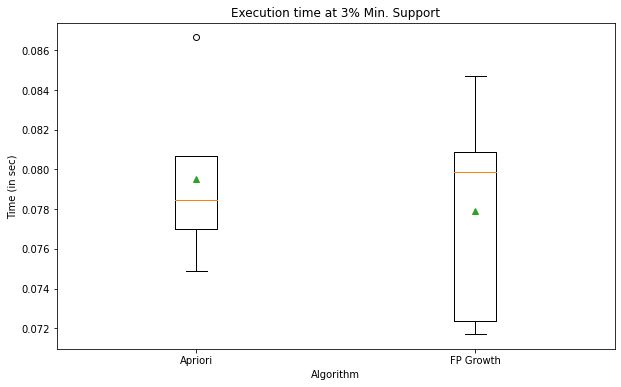

In [ ]:
testcases = [''' 
def fn(): 
    return apriori(data, min_support = 0.03, use_colnames=True)
''',
''' 
def fn(): 
    return fpgrowth(data, min_support = 0.03, use_colnames=True)
''']

res_apriori3 = repeat(stmt=testcases[0], repeat=5)

res_fpgrowth3 = repeat(stmt=testcases[1], repeat=5)

results3 = [res_apriori3,res_fpgrowth3]

plt.figure(figsize=(10,6))
plt.boxplot(results3, labels=["Apriori", "FP Growth"], showmeans=True)
plt.title("Execution time at 3% Min. Support")
plt.xlabel("Algorithm")
plt.ylabel("Time (in sec)")
plt.show()

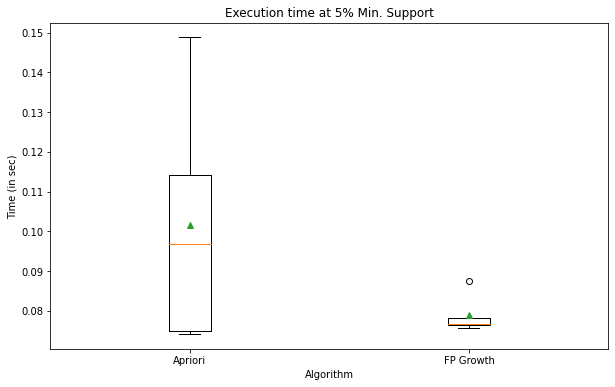

In [ ]:
testcases = [''' 
def fn(): 
    return apriori(data, min_support = 0.05, use_colnames=True)
''',
''' 
def fn(): 
    return fpgrowth(data, min_support = 0.05, use_colnames=True)
''']

res_apriori5 = repeat(stmt=testcases[0], repeat=5)

res_fpgrowth5 = repeat(stmt=testcases[1], repeat=5)


results5 = [res_apriori5,res_fpgrowth5]

plt.figure(figsize=(10,6))
plt.boxplot(results5, labels=["Apriori", "FP Growth"], showmeans=True)
plt.title("Execution time at 5% Min. Support")
plt.xlabel("Algorithm")
plt.ylabel("Time (in sec)")
plt.show()

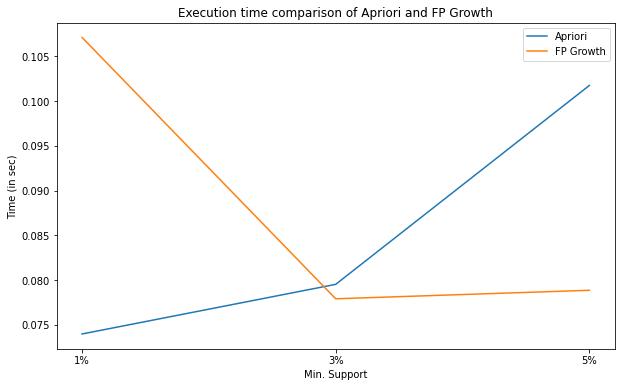

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(["1%","3%","5%"],[np.mean(results1[0]),np.mean(results3[0]),np.mean(results5[0])], label="Apriori")
sns.lineplot(["1%","3%","5%"],[np.mean(results1[1]),np.mean(results3[1]),np.mean(results5[1])], label="FP Growth")
plt.title("Execution time comparison of Apriori and FP Growth")
plt.xlabel("Min. Support")
plt.ylabel("Time (in sec)")
plt.show()

#**Final Takeaways:**

**1. Memory Utilization:** Apriori Algorithm requires large memory space as they deal with large number of candidate itemset generation. FP Growth algorithm requires less memory due to its compact structure.

**2. Search Type:** Apriori uses breadth first search whereas FP Growth uses a depth first search.

**3. No. of Scans:** Apriori performs multiple scans for generating the candidate set whereas FP growth algorithm scans the database only twice. 

**4. Time:** In Apriori algorithm, execution time increases exponentially depending on the number of different items. FP growth's execution time is lesser compared to Apriori.